<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [5]:
%pip install seaborn

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [ ]:
# path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [9]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [15]:
#original file download
filepath ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df_original = pd.read_csv(filepath, header=0)
file_path = r"C:\Users\Raegan\Downloads\Project_InsuranceCostAnalysis_original.csv"  #remname file
try:
    df_original.to_csv(file_path, index=False)
    print(f'DataFrame saved to {file_path}')
except Exception as e:
    print(f'An error occurred: {e}')

DataFrame saved to C:\Users\Raegan\Downloads\Project_InsuranceCostAnalysis_original.csv


<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(path, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario. 


In [11]:
headers = ["Age", "Gender", "BMI", "Num_Children", "Smoker", "Region", "Charges"]
df.columns = headers
df

,Age,Gender,BMI,Num_Children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


<details>
    <summary>Click here for Solution</summary>

```python
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
```

</details>


Now, replace the '?' entries with 'NaN' values.


In [13]:
df.replace('?', np.nan, inplace=True)

<details>
    <summary>Click here for Solution</summary>

```python
df.replace('?', np.nan, inplace = True)
```

</details>


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [15]:
print(df.info())
null_counts_isnull = df.isnull().sum()
print(null_counts_isnull)
# or
null_counts_isna = df.isna().sum()
print(null_counts_isna)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2768 non-null   object 
 1   Gender        2772 non-null   int64  
 2   BMI           2772 non-null   float64
 3   Num_Children  2772 non-null   int64  
 4   Smoker        2765 non-null   object 
 5   Region        2772 non-null   int64  
 6   Charges       2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None
Age             4
Gender          0
BMI             0
Num_Children    0
Smoker          7
Region          0
Charges         0
dtype: int64
Age             4
Gender          0
BMI             0
Num_Children    0
Smoker          7
Region          0
Charges         0
dtype: int64


In [17]:
for column in df.columns:
    if df[column].isnull().any():
        print(f"{column} has {df[column].isnull().sum()} null values")

Age has 4 null values
Smoker has 7 null values


In [21]:
null_columns = df.columns[df.isnull().any()]
for column in null_columns:
    print(f"\nRows with null values in column '{column}':")
    print(df[df[column].isnull()])


Rows with null values in column 'Age':
      Age  Gender     BMI  Num_Children Smoker  Region      Charges
234   NaN       2  24.510             2      0       1   6710.19190
1836  NaN       2  29.600             4      0       3   7512.26700
2180  NaN       1  31.920             2      0       1   7209.49180
2664  NaN       2  29.925             1      1       2  22462.04375

Rows with null values in column 'Smoker':
    Age  Gender     BMI  Num_Children Smoker  Region      Charges
5    31       1  25.740             0    NaN       4   3756.62160
28   23       2  17.385             1    NaN       1   2775.19215
72   53       1  28.100             3    NaN       3  11741.72600
122  20       1  28.975             0    NaN       1   2257.47525
176  38       2  27.835             2    NaN       1   6455.86265
242  55       1  26.800             1    NaN       3  35160.13457
324  29       2  27.200             0    NaN       3   2866.09100


<details>
    <summary>Click here for Solution</summary>

```python
print(df.info())
```

</details>


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [35]:
# Update data types - currently type object - do this first so no errors
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

# age is a continuous variable, replace with mean age
#df.loc[df["Age"].isnull(), "Age"] = mean_age  #ensure you are using the originalj dataframe
#df["Age"] = df["Age"].fillna(mean_age)
df["Age"] = df["Age"].fillna(mean_age)
df["Smoker"] = df["Smoker"].fillna(is_smoker)

# smoker is a categorical attribute, replace with most frequent entry
#df.loc[df["Smoker"].isnull(), "Smoker"] = is_smoker
#df["Smoker"] = df["Smoker"].fillna(is_smoker)
df["Age"] = df["Age"].fillna(mean_age)
df["Smoker"] = df["Smoker"].fillna(is_smoker)

# Update data types - currently type object
#df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2772 non-null   int32  
 1   Gender        2772 non-null   int64  
 2   BMI           2772 non-null   float64
 3   Num_Children  2772 non-null   int64  
 4   Smoker        2772 non-null   int32  
 5   Region        2772 non-null   int64  
 6   Charges       2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


<details>
    <summary>Click here for Solution</summary>

```python
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
```

</details>


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [40]:
df[["Charges"]] = np.round(df[["Charges"]],2)
print(df.head())

   Age  Gender     BMI  Num_Children  Smoker  Region   Charges
0   19       1  27.900             0       1       3  16884.92
1   18       2  33.770             1       0       4   1725.55
2   28       2  33.000             3       0       4   4449.46
3   33       2  22.705             0       0       1  21984.47
4   32       2  28.880             0       0       1   3866.86


In [75]:
file_path = r"C:\Users\Raegan\Downloads\Project_InsuranceCostAnalysis_cleaned.csv"  #remname file
try:
    df.to_csv(file_path, index=False)
    print(f'DataFrame saved to {file_path}')
except Exception as e:
    print(f'An error occurred: {e}')

DataFrame saved to C:\Users\Raegan\Downloads\Project_InsuranceCostAnalysis_cleaned.csv


<details>
    <summary>Click here for Solution</summary>

```python
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())
```
</details>


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.85800000001)

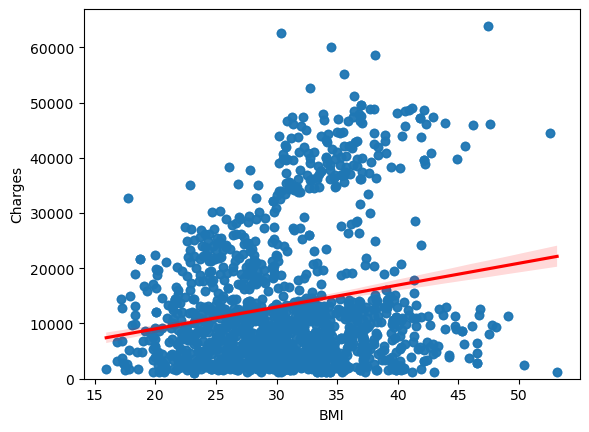

In [50]:
sns.regplot(x="BMI", y="Charges", data=df, line_kws={"color":"red"})
plt.ylim(0,)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
```
</details>


Implement the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='Smoker', ylabel='Charges'>

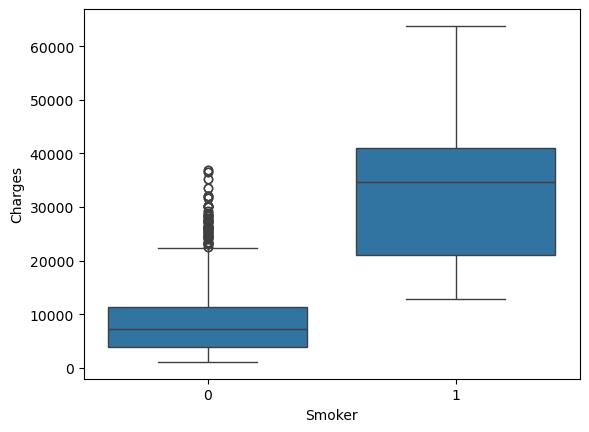

In [52]:
sns.boxplot(x="Smoker", y="Charges", data=df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


In [58]:
corr_matrix = df.corr()
rounded_corr_matrix= corr_matrix.round(2)
print(rounded_corr_matrix)

               Age  Gender   BMI  Num_Children  Smoker  Region  Charges
Age           1.00   -0.03  0.11          0.04   -0.02   -0.01     0.30
Gender       -0.03    1.00  0.04          0.02    0.08    0.02     0.06
BMI           0.11    0.04  1.00         -0.00    0.01    0.27     0.20
Num_Children  0.04    0.02 -0.00          1.00    0.01   -0.03     0.07
Smoker       -0.02    0.08  0.01          0.01    1.00    0.05     0.79
Region       -0.01    0.02  0.27         -0.03    0.05    1.00     0.05
Charges       0.30    0.06  0.20          0.07    0.79    0.05     1.00


<details>
    <summary>Click here for Solution</summary>

```python
print(df.corr())
```
</details>


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [60]:
X = df[['Smoker']]
Y = df['Charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


<details>
    <summary>Click here for Solution</summary>

```python
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))
```
</details>


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [62]:
Z = df[["Age", "Gender", "BMI", "Num_Children", "Smoker", "Region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


<details>
    <summary>Click here for Solution</summary>

```python
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))
```
</details>


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [64]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452577201066602


<details>
    <summary>Click here for Solution</summary>

```python
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
```
</details>


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [69]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

<details>
    <summary>Click here for Solution</summary>

```python
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
```
</details>


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [71]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582406


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))
```
</details>


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [73]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608056


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))
```
</details>


# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
